# 2019 MLB Model Predictions and Model Analysis

## The goals of this notebook are the following:
### 1. Use our selected model to accurately predict 2019 Starting Pitcher Season Strikeouts
### 2. Evaluate Model's Predictions vs Actual Values 
### 3. Gain insights into which baseball stats are most important in accurate strikeout predictions

In [1]:
import pickle  #importing necessary libraries
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)

import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
df=pd.read_csv('Cleanpitcherdataset.csv') #reading in dataset

In [3]:
df.shape #shape of the dataset

(1198, 61)

In [4]:
df=df[df.Season==2019] #restricting to just 2019 season data

In [5]:
df.drop(axis=1,labels='Unnamed: 0',inplace=True)

In [6]:
df.columns

Index(['Name', 'Age', 'Lev', 'Tm', 'GS', 'IP', 'H', 'BB', 'SO', 'HR', 'HBP',
       'ERA', '2B', '3B', 'Pit', 'Str', 'LD', 'PU', 'BAbip', 'Season', 'WAR',
       'Balls', 'Pitches', 'BABIP', 'LOB%', 'FIP', 'LD%', 'GB%', 'FB%', 'FBv',
       'SL%', 'SLv', 'CB%', 'CBv', 'CH%', 'CHv', 'wFB', 'wSL', 'wCB', 'wCH',
       'O-Swing%', 'Z-Swing%', 'Swing%', 'O-Contact%', 'Z-Contact%',
       'Contact%', 'Zone%', 'F-Strike%', 'SwStr%', 'Soft%', 'Med%', 'Hard%',
       'Best_Pitch', '95mph+', 'O-Swing%_Elite', 'FStrike_elite',
       'Fstrikeelite_95mph+', 'CH', 'FB', 'SL'],
      dtype='object')

In [8]:
df_feats=df.drop(axis=1,labels=['Name','Lev','Tm','Best_Pitch','SO'])
#removing features not relevant to model

In [9]:
df_feats.shape #shape of 2019 season dataset

(199, 55)

In [10]:
pickle_in_2 = open("model.pickle","rb") #importing model
final_model = pickle.load(pickle_in_2)

In [11]:
type(final_model) #confirming type 

list

In [12]:
final_model[0].coef_ #coefficents of model

array([ -3.62600432,  25.85180735, -39.96738961,   6.56261869,
        16.76504081,   0.79293351,   2.66830746,  -0.89713463,
        39.0296848 ,  -1.19678287,  -1.14579753,   4.94457759,
        -2.60397306,  16.4276848 , -51.02172541,  47.26078211,
         3.98555395,   1.25305524,  -7.05400818,  -0.84642286,
         1.07118295,  -1.76782614,  -1.23380131,  -2.43367986,
        -2.60438716,   1.25055683,   2.35460807,  -6.04304573,
        -1.44176096,   3.4141885 ,  18.24740188,  27.37602917,
        32.18045256,  -0.77075281])

In [13]:
final_model[1] #selected features for model

Index(['GS', 'IP', 'H', 'BB', 'HR', 'HBP', 'ERA', '2B', 'Pit', 'Str', 'PU',
       'BAbip', 'Season', 'WAR', 'Balls', 'Pitches', 'BABIP', 'LOB%', 'FIP',
       'CH%', 'CHv', 'wFB', 'wCH', 'O-Swing%', 'Swing%', 'O-Contact%',
       'Z-Contact%', 'Contact%', 'Zone%', 'SwStr%', 'Soft%', 'Med%', 'Hard%',
       'SL'],
      dtype='object')

In [14]:
coefs=[]
feats=[]
for i in range(len(final_model[1])):
    coefs.append(final_model[0].coef_[i])
    feats.append(final_model[1][i])


In [15]:
Big_list=list(zip(feats,coefs)) 

In [16]:
Big_list #coefficents by feature

[('GS', -3.626004319495919),
 ('IP', 25.851807354012973),
 ('H', -39.96738961389078),
 ('BB', 6.56261868693877),
 ('HR', 16.76504080675699),
 ('HBP', 0.792933510168026),
 ('ERA', 2.668307462440173),
 ('2B', -0.8971346277504667),
 ('Pit', 39.02968479841081),
 ('Str', -1.1967828662215998),
 ('PU', -1.145797526512575),
 ('BAbip', 4.944577590797001),
 ('Season', -2.603973056270497),
 ('WAR', 16.427684803951813),
 ('Balls', -51.021725409800794),
 ('Pitches', 47.26078210502864),
 ('BABIP', 3.9855539483344566),
 ('LOB%', 1.2530552373341304),
 ('FIP', -7.054008183913746),
 ('CH%', -0.8464228618272487),
 ('CHv', 1.0711829495831868),
 ('wFB', -1.7678261434469447),
 ('wCH', -1.2338013088168431),
 ('O-Swing%', -2.433679855049966),
 ('Swing%', -2.604387160354756),
 ('O-Contact%', 1.2505568251865058),
 ('Z-Contact%', 2.354608072224571),
 ('Contact%', -6.043045732966128),
 ('Zone%', -1.441760955784058),
 ('SwStr%', 3.414188503828259),
 ('Soft%', 18.247401884302803),
 ('Med%', 27.376029166934483),
 ('

In [17]:
scaler = StandardScaler()
scaler.fit(df_feats[final_model[1]]) #scaling data

StandardScaler()

In [18]:
holdout=df_feats[final_model[1]]

In [19]:
transformed_holdout = scaler.transform(holdout) #scaling dataset

In [20]:
Predictions_2019 = final_model[0].predict(transformed_holdout)

In [21]:
Predictions_2019 #array of predictions for each pitcher in dataset

array([ 23.38873268, 163.24306239,  43.69406176, 103.08448089,
       118.95978689,  63.26478381, 135.2638265 , 104.572469  ,
       154.24469326,  47.91284954,  67.78136153, 129.65852238,
       242.79832176,  59.16865765, 107.29434722, 190.33925812,
       249.92785499, 218.53526524,  96.49417988,  78.9258018 ,
        29.99628419, 206.01342779, 197.93034189, 165.92421581,
        78.10351936, 100.11854812,  96.22422777, 114.92887767,
        82.52043198, 213.63885164,  81.47944481,  95.93728758,
        69.01931081,  65.18599535, 103.11870092,  37.70343267,
        57.69751675, 167.37894528, 299.8675352 ,  65.49513008,
       222.91073001,  29.18434602, 217.21306037, 101.48365455,
       246.48006648, 156.4975004 ,  30.11851454, 110.59112898,
       126.66906096,  41.44566761,  69.80685491,  42.27070902,
       147.21973197, 223.65536812,  99.27068347,  86.24589046,
        79.75862341, 156.17566597,  94.11073529, 112.85465155,
       150.1469197 , 151.37276701, 212.79796593,  72.45

In [22]:
from sklearn import metrics

Predictions_2019_mae = metrics.mean_absolute_error((df['SO']), (Predictions_2019))
Predictions_2019_mse = metrics.mean_squared_error((df['SO']), (Predictions_2019))
Predictions_2019_rmse = np.sqrt(metrics.mean_squared_error((df['SO']), (Predictions_2019)))

In [23]:
print(Predictions_2019_mae)
print(Predictions_2019_mse)
print(Predictions_2019_rmse) #model evaluation metrics

7.095164035558047
91.34519094357712
9.557467810229712


In [24]:
R_score=metrics.r2_score(df['SO'],Predictions_2019)

In [25]:
R_score 

0.9722270146729567

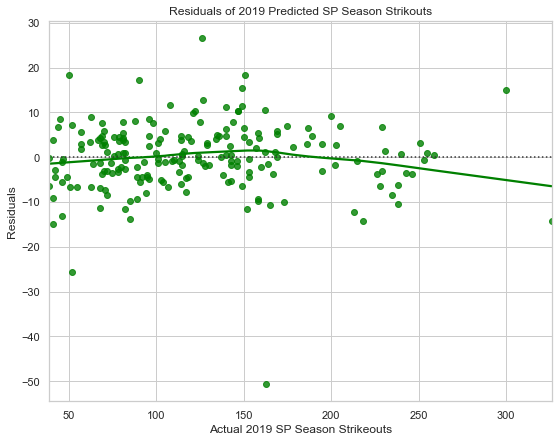

In [53]:
fig,ax=plt.subplots(figsize=(9,7))
sns.residplot(df['SO'],Predictions_2019,color='green',lowess=True,ax=ax)
ax.set_ylabel('Residuals')
ax.set_xlabel('Actual 2019 SP Season Strikeouts')
ax.set_title('Residuals of 2019 Predicted SP Season Strikouts')
fig.savefig('Residuals of 2019 Predicted SP Season Strikouts.png')

# As can be seen in the residual plot above, the variations in our predicted values were random and thus we do not see any heteroscedasticity. There does seem to be some larger variation as we approach 300 strikeouts. However, we are not overly concerned about this considering the vast majority of SP will not come close to 300 strikeouts in a season.

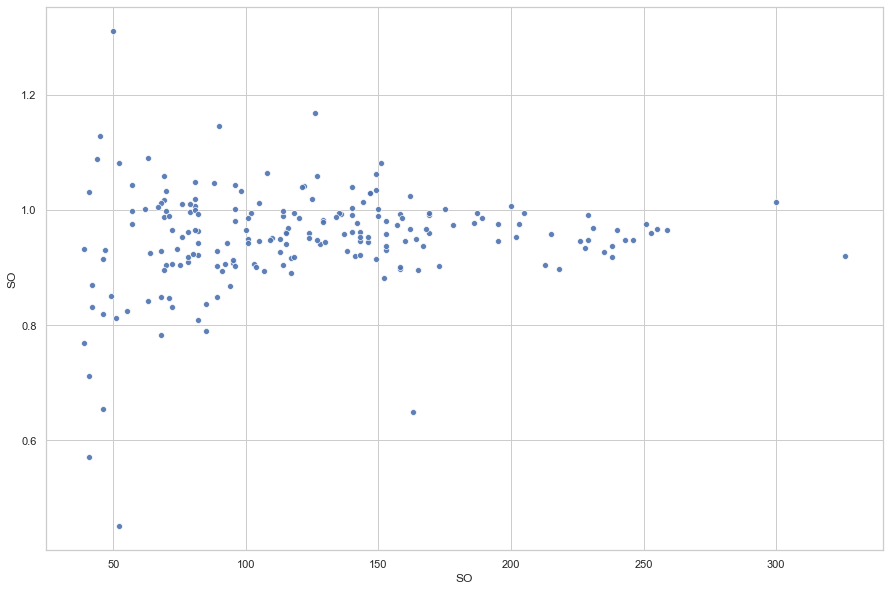

In [27]:
fig,ax=plt.subplots(figsize=(15,10))
sns.scatterplot(x=df['SO'], y=(Predictions_2019/df['SO']),palette='red',alpha=.9,ax=ax)

In [28]:
df_new=df

In [29]:
df_new['True_Ratio']=Predictions_2019/df['SO']

In [30]:
df_new['True_Ratio'].describe()

count    199.000000
mean       0.951313
std        0.088774
min        0.451717
25%        0.918443
50%        0.959353
75%        0.995048
max        1.309903
Name: True_Ratio, dtype: float64

In [31]:
df_new['True_Ratio'].min()

0.4517166303150415

In [32]:
conds=[df['True_Ratio']<=.92,df['True_Ratio']<=1,df['True_Ratio']<=df['True_Ratio'].max()]
choices=[0,1,2,]
df_new['Cat']=np.select(conds,choices)

In [33]:
y=df_new['Cat'].value_counts(normalize=True)
y

1    0.517588
0    0.266332
2    0.216080
Name: Cat, dtype: float64

In [34]:
x=y.index

Text(0.5, 1.0, 'Frequency of True Values')

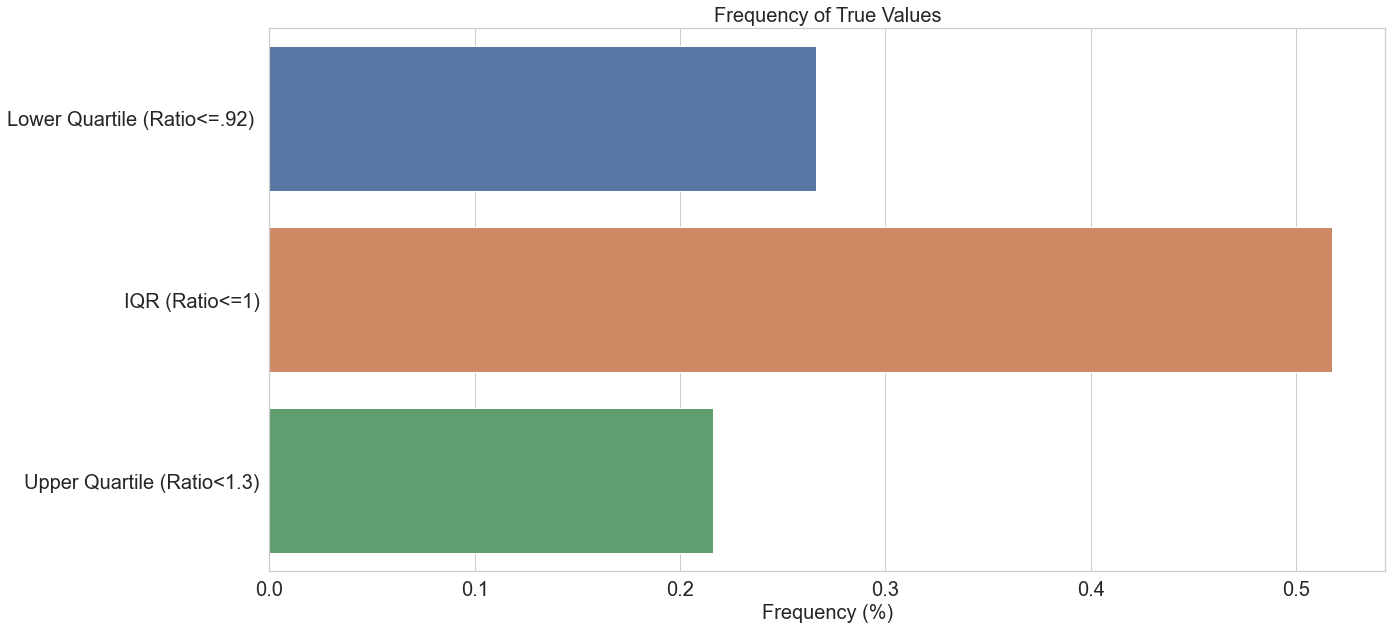

In [35]:
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(x=y,y=x,ax=ax,orient='h')
ax.set_yticklabels(labels=['Lower Quartile (Ratio<=.92) ','IQR (Ratio<=1)','Upper Quartile (Ratio<1.3)'],fontsize=12)
ax.set_xlabel('Frequency (%)',fontsize=20)
ax.tick_params(axis='both',labelsize=20)
ax.set_title('Frequency of True Values',fontsize=20)

In [36]:
y=df_new['Cat']
x=y.index

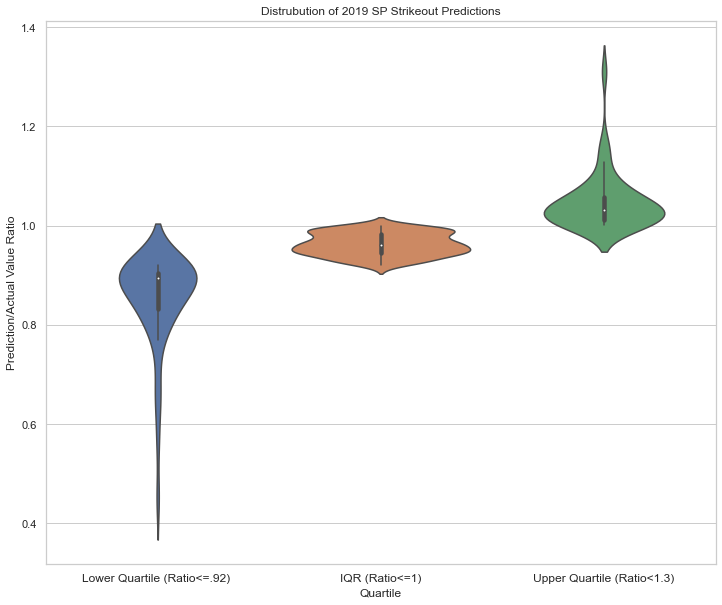

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(figsize=(12,10))
sns.violinplot(x='Cat',y='True_Ratio',data=df_new,ax=ax)
ax.set_xlabel('Quartile',fontsize=12)
ax.set_xticklabels(labels=['Lower Quartile (Ratio<=.92) ','IQR (Ratio<=1)','Upper Quartile (Ratio<1.3)'],fontsize=12)
ax.set_ylabel('Prediction/Actual Value Ratio',fontsize=12)
ax.set_title('Distrubution of 2019 SP Strikeout Predictions',fontsize=12)
fig.savefig('Distrubution of 2019 SP Strikeout Predictions.png')

# Modeling Conclusions and Insights

## With a calculated R squared value of .97 and an RMSE of 9.6 strikeouts, our model exceeded our expectations. 
## 1. Based on these metrics, we conclude that  a General Manager can feel confident that our model will give an accurate estimate of a pitcher's total strikeout numbers in a given year. Thus, we believe a lot of insight into strikeout numbers for starting pitchers can be found by analyzing our model.
## 2. By analyzing our model's coefficients and our baseball knowledge, we conclude that a pitcher's previous season HR numbers and Hard Hit rate should not exclude a pitcher for being considered for a contract. The reason for this is becuase our model actually found a strong correlation between these features and our target variable (Strikeouts). Despite the fact that our model found high coefficents for these features, through our hypothesis testing, we found that a pitcher who throws 95 mph or greater is far more likely to post high strikeouts numbers. Thus, we recommend that a general manager not outright dismiss a player who allows high HR numbers because that pitcher may have elite fastball velocity, which leads to high strikeout numbers.
## 3.Based on our model's coefficents, We would also reccommend that a GM prioritizes a pitcher's pitch efficiency over any other statistic. In our model, we found that the amount of balls a pitcher throws is mostly strongly correlated (in the negative direction) out of all our coefficients.Thus, we encourage GMs to look closely at starting pitchers who most effectively minimized the amounts of balls thrown in a season. This allows for starting pitchers to provide more length in their starts as well as increase their strikeout numbers.